## 5.3. THAO TÁC VỚI CSDL SQLite VỚI PYTHON
#### 5.3.1. Kết nối với SQL

In [ ]:
import sqlite3
import pandas as pd # <-- Cần import thư viện

In [2]:
# 1. Kết nối CSDL (Giữ nguyên như đã học)
# Nên dùng Context Manager (như đã góp ý ở phần khác)
with sqlite3.connect('example_db.db') as conn:

# 2. Định nghĩa câu lệnh SQL (Truy vấn)
    sql_query = """
    SELECT Name, Number
    FROM bang_diem
    WHERE Number > 7.0
    ORDER BY Number DESC;
    """

print("Đang truy vấn dữ liệu từ CSDL...")

Đang truy vấn dữ liệu từ CSDL...


>#### 5.3.2. Truy vấn Dữ liệu trực tiếp vào Pandas DataFrame
```python
pandas.read_sql_query(sql, conn) 
pandas.read_sql(sql, conn).
```


In [ ]:
# 3. THAO TÁC CỐT LÕI (Chỉ một dòng lệnh)
# pd.read_sql_query(câu lệnh SQL, đối tượng kết nối)
df_ket_qua = pd.read_sql_query(sql_query, conn)             #Đọc dữ liệu từ CSDL SQLite vào DataFrame

# 4. In và Phân tích kết quả (Đã là DataFrame)
print("\nTruy vấn thành công. Dữ liệu đã được load vào DataFrame:")
print(df_ket_qua)
print("\nThông tin Data Type (Dtype) của DataFrame:")
print(df_ket_qua.info())

# KẾT THÚC: conn tự động đóng nhờ cấu trúc 'with'


Truy vấn thành công. Dữ liệu đã được load vào DataFrame:
  Name  Number
0    B     8.5

Thông tin Data Type (Dtype) của DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1 non-null      object 
 1   Number  1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 148.0+ bytes
None


## **1. So sánh Hiệu quả:** 
#### Khác biệt lớn giữa việc dùng 1 dòng pd.`read_sql_query`(...) so với chuỗi lệnh truyền thống 
#### 
```python
    cursor = conn.cursor() -> cursor.execute() -> results = cursor.fetchall()
```
#### -> chuyển đổi List sang DataFrame.
## **2.Sử dụng DataFrame**:

#### Thực hiện tính toán

In [6]:
df_ket_qua['Name'].value_counts()

Name
B    1
Name: count, dtype: int64

#### Có thể trực quan hóa ngay:

<Axes: xlabel='Name'>

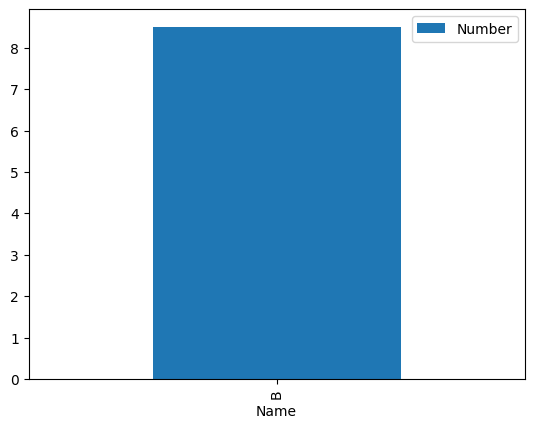

In [7]:
df_ket_qua.plot.bar(x='Name', y='Number')

Việc sử dụng DataFrame ngay lập tức làm tăng tính ứng dụng và nâng cao mức độ chuyên sâu cho đối tượng Khoa học Dữ liệu.

## 5.3.3. Kết nối và Thao tác DML/DDL bằng cấu trúc with.
* #### **DML: Data Manipulation Language** (Ngôn ngữ Thao tác Dữ liệu)
  * #### `INSERT, UPDATE, DELETE` 
    - #### **Lưu ý** Luôn cần conn.commit() sau khi chạy các lệnh trên
  * #### `SELECT` truy vẫn (Truy xuất/lấy dữ liệu từ một hoặc nhiều bảng.)
    - #### Không cần conn.commit(). Đây là lệnh quan trọng nhất trong Khoa học Dữ liệu.



* #### **DDL: Data Definition Language** (Ngôn ngữ Định nghĩa Dữ liệu)
  * #### CREATE, ALTER, DROP
    - CREATE: Tạo đối tượng mới trong CSDL (ví dụ: tạo bảng mới, tạo database mới).
    - ALTER: Thay đổi cấu trúc của đối tượng đã tồn tại (ví dụ: thêm cột mới, sửa kiểu dữ liệu của cột).
    - Xóa toàn bộ đối tượng khỏi CSDL (ví dụ: xóa một bảng).

In [ ]:
import sqlite3

# Sử dụng cấu trúc WITH để quản lý kết nối
with sqlite3.connect('example_db.db') as conn:
    cursor = conn.cursor()

    # 1. Tạo bảng (DDL)
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS sinh_vien (
            id INTEGER PRIMARY KEY,
            name TEXT NOT NULL,
            diem REAL
        )
    """)

    # 2. Thêm dữ liệu (DML)
    cursor.execute("INSERT INTO sinh_vien (name, diem) VALUES (?, ?)",
                   ("Nguyen Van A", 8.5))

    # 3. Lưu thay đổi (Commit)
    # RẤT QUAN TRỌNG: Khi dùng WITH, bạn vẫn phải tự gọi conn.commit()
    # Nếu không có commit(), lệnh INSERT sẽ không được lưu vào CSDL.
    conn.commit()

    print("Đã thêm dữ liệu và lưu thay đổi thành công.")

# Kết nối đã tự động đóng

Đã thêm dữ liệu và lưu thay đổi thành công.
